<font color='red'>**Imaging system model with defocus**</font>

**Initialization (nm)**

import necesary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from models import imaging_system
import visualizations as viz
import utilities as utls

configure simulation parameters (unit: nm)

In [2]:
na = 0.1 # numerical aperture

wavlen = 200 # illumination wavelength

sampling = ((636, 636), (wavlen, wavlen)) # object-image plane sampling 


initializing imaging system model

In [3]:
model = imaging_system(sampling, na, wavlen)

check sampling

In [4]:
model.print_sampling()

pupil plane sampling interval:
v: 0.0157
u: 0.0157
pupil plane sampling field-of-view:
v: 10.00
u: 10.00


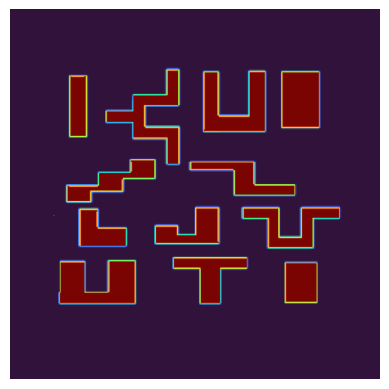

In [5]:
obj = plt.imread('mask.png')[:, :, 0:-1]
obj = 1-np.mean(np.abs(np.array(obj)), -1)

fig, ax = viz.imshow(obj)


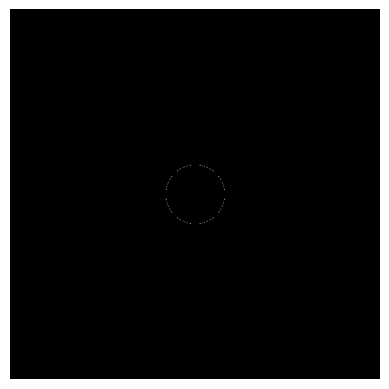

In [6]:
r1 = 0.795
r2 = 0.80

pupil_sampling_grid = model.calcu_pupil_sampling_grid()

[r, phi] = utls.cart2pol(*pupil_sampling_grid)

# compute the source as a ring 
# with inner and outter radius r1 and r2, respectively.
src = np.logical_and(r<=r2,r>= r1).astype(float)

fig, axs = viz.imshow(src, cmap='gray')


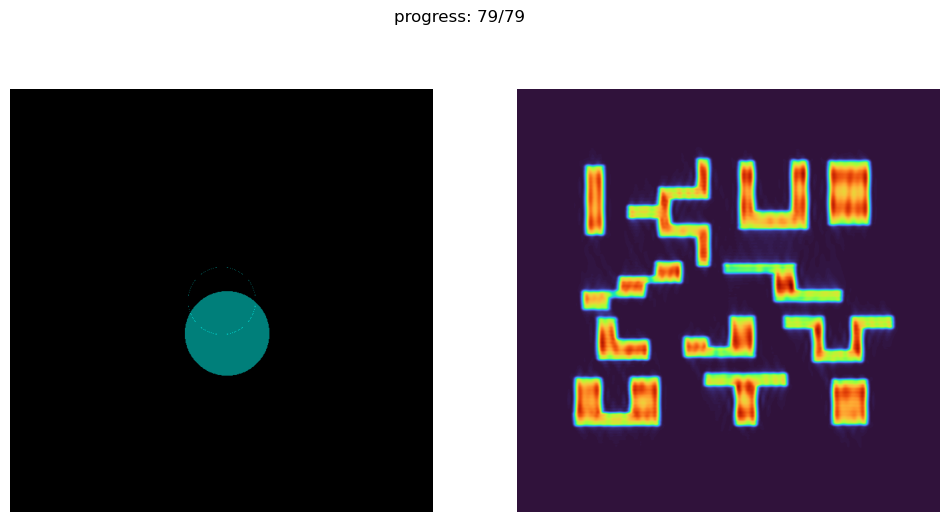

In [7]:
# partially coherent imaging

pupil = model.compute_pupil()

img = np.zeros_like(obj)

src_coord_list = list(zip(*src.nonzero()))
#src_coord_list = np.transpose(np.where(src == 1)) # list of coordinate (y,x) of each source pint

fig, axs = plt.subplots(1,2, figsize=(12,6))

for ind, src_coord in enumerate(src_coord_list):    
    
    shifted_pupil = utls.shifter(pupil,src_coord)  # shift pupil
    
    temp = np.abs(utls.ifft2(utls.fft2(obj)*shifted_pupil))**2 # perform imaging
    
    title = 'progress: ' + str(ind) + '/' + str(len(src_coord_list)-1)
    
    fig, axs[0] = viz.imshow(shifted_pupil+src, fig=fig, ax=axs[0])
    fig, axs[1] = viz.imshow(temp, fig=fig, ax=axs[1])
                                 
    fig.suptitle(title)
    
    img += temp # sum over contributions by all sources 


In [8]:
print((src_coord_list))

[(268, 309), (268, 310), (268, 326), (268, 327), (269, 305), (269, 331), (270, 302), (270, 334), (271, 299), (271, 337), (272, 297), (272, 339), (274, 293), (274, 343), (275, 291), (275, 345), (277, 288), (277, 348), (278, 287), (278, 349), (287, 278), (287, 358), (288, 277), (288, 359), (291, 275), (291, 361), (293, 274), (293, 362), (297, 272), (297, 364), (299, 271), (299, 365), (302, 270), (302, 366), (305, 269), (305, 367), (309, 268), (309, 368), (310, 268), (310, 368), (326, 268), (326, 368), (327, 268), (327, 368), (331, 269), (331, 367), (334, 270), (334, 366), (337, 271), (337, 365), (339, 272), (339, 364), (343, 274), (343, 362), (345, 275), (345, 361), (348, 277), (348, 359), (349, 278), (349, 358), (358, 287), (358, 349), (359, 288), (359, 348), (361, 291), (361, 345), (362, 293), (362, 343), (364, 297), (364, 339), (365, 299), (365, 337), (366, 302), (366, 334), (367, 305), (367, 331), (368, 309), (368, 310), (368, 326), (368, 327)]


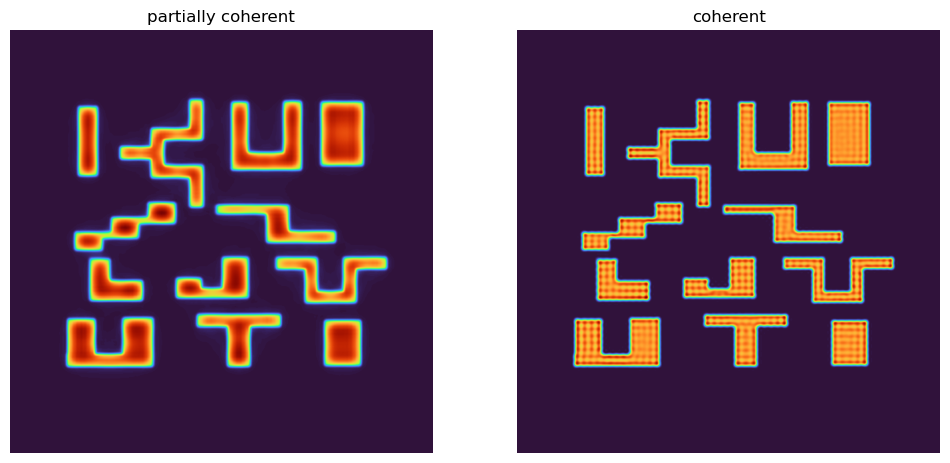

In [9]:
fig, axs = plt.subplots(1,2, figsize=(12,6))

fig, axs[0] = viz.imshow(img, fig=fig, ax=axs[0], title='partially coherent')
fig, axs[1] = viz.imshow(model(obj), fig=fig, ax=axs[1], title='coherent')


In [10]:
from tqdm import tqdm

def partially_coherent_imaging(model, obj, src):
      
    pupil = model.compute_pupil()

    img = np.zeros_like(obj)

    src_coord_list = np.transpose(np.where(src == 1)) 
    
    for ind, src_coord in tqdm(enumerate(src_coord_list),total = len(src_coord_list)):    

        shifted_pupil = utls.shifter(pupil,src_coord) 

        temp = np.abs(utls.ifft2(utls.fft2(obj)*shifted_pupil))**2 

        img += temp 
        
    return img


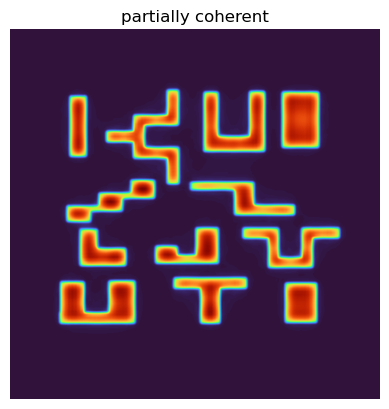

In [11]:
img = partially_coherent_imaging(model, obj, src)
fig, axs = viz.imshow(img, title='partially coherent')